In [1]:
import numpy as np
from cleands import *
from itertools import product

def generate_x(n,rho,alpha,sig,burn=100):
    x = np.random.normal(size=(n+burn,))*sig
    for i in range(1,n+burn):
        x[i] += alpha+rho*x[i-1]
    return x[burn:]
def ar1_regression(x):
    n = x.shape[0]
    xmat = x[:-1]
    ones = np.ones((n-1,1))
    xmat = np.hstack((ones,xmat.reshape(-1,1)))
    ymat = x[1:]
    return least_squares_regressor(xmat,ymat)
def simulate(n,rho,alpha,sig,nsim=1000):
    outp = []
    for isim in range(nsim):
        y = generate_x(n,rho,alpha,sig)
        model = ar1_regression(y)
        outp += [model.params[1]]
    return np.array(outp).mean(),np.array(outp).var()


outp = []
nvec = np.arange(10,110,10)
rvec = np.arange(-0.9,1,0.1)
avec = np.arange(-3,4,2)
svec = np.arange(0.5,2.5,0.5)
for n,rho,alpha,sig in product(nvec,rvec,avec,svec):
    print(n,rho,alpha,sig)
    mean,var = simulate(n,rho,alpha,sig)
    outp += [(n,rho,alpha,sig,mean,var)]
outp = np.array(outp)

10 -0.9 -3 0.5
10 -0.9 -3 1.0
10 -0.9 -3 1.5
10 -0.9 -3 2.0
10 -0.9 -1 0.5
10 -0.9 -1 1.0
10 -0.9 -1 1.5
10 -0.9 -1 2.0
10 -0.9 1 0.5
10 -0.9 1 1.0
10 -0.9 1 1.5
10 -0.9 1 2.0
10 -0.9 3 0.5
10 -0.9 3 1.0
10 -0.9 3 1.5
10 -0.9 3 2.0
10 -0.8 -3 0.5
10 -0.8 -3 1.0
10 -0.8 -3 1.5
10 -0.8 -3 2.0
10 -0.8 -1 0.5
10 -0.8 -1 1.0
10 -0.8 -1 1.5
10 -0.8 -1 2.0
10 -0.8 1 0.5
10 -0.8 1 1.0
10 -0.8 1 1.5
10 -0.8 1 2.0
10 -0.8 3 0.5
10 -0.8 3 1.0
10 -0.8 3 1.5
10 -0.8 3 2.0
10 -0.7000000000000001 -3 0.5
10 -0.7000000000000001 -3 1.0
10 -0.7000000000000001 -3 1.5
10 -0.7000000000000001 -3 2.0
10 -0.7000000000000001 -1 0.5
10 -0.7000000000000001 -1 1.0
10 -0.7000000000000001 -1 1.5
10 -0.7000000000000001 -1 2.0
10 -0.7000000000000001 1 0.5
10 -0.7000000000000001 1 1.0
10 -0.7000000000000001 1 1.5
10 -0.7000000000000001 1 2.0
10 -0.7000000000000001 3 0.5
10 -0.7000000000000001 3 1.0
10 -0.7000000000000001 3 1.5
10 -0.7000000000000001 3 2.0
10 -0.6000000000000001 -3 0.5
10 -0.6000000000000001 -3 1.0
10 -

In [13]:
df = pd.DataFrame(outp,columns=['n','rho','alpha','sig','mean','var'])
df

,n,rho,alpha,sig,mean,var
0,10.0,-0.9,-3.0,0.5,-0.804156,0.048845
1,10.0,-0.9,-3.0,1.0,-0.814128,0.044864
2,10.0,-0.9,-3.0,1.5,-0.807294,0.051496
3,10.0,-0.9,-3.0,2.0,-0.801627,0.052969
4,10.0,-0.9,-1.0,0.5,-0.809345,0.044684
...,...,...,...,...,...,...
3035,100.0,0.9,1.0,2.0,0.857879,0.003177
3036,100.0,0.9,3.0,0.5,0.859441,0.003660
3037,100.0,0.9,3.0,1.0,0.861768,0.003095
3038,100.0,0.9,3.0,1.5,0.862293,0.003211


In [14]:
df['bias'] = df['mean']-df['rho']

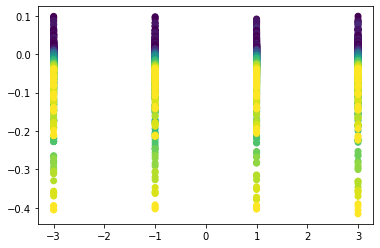

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df['alpha'],df['bias'],c=df['rho'])

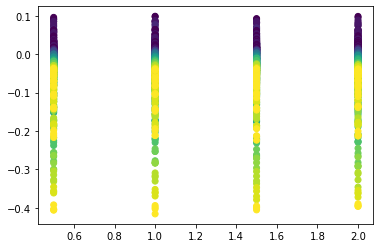

In [16]:

plt.scatter(df['sig'],df['bias'],c=df['rho'])

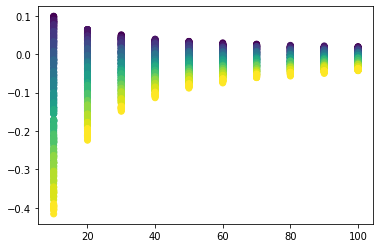

In [17]:
plt.scatter(df['n'],df['bias'],c=df['rho'])

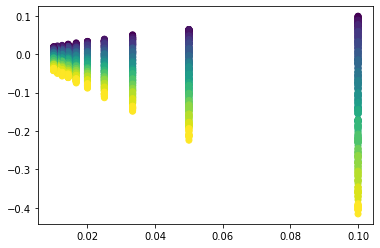

In [20]:
plt.scatter(1/df['n'],df['bias'],c=df['rho'])

In [21]:
df['1'] = 1
ddf = pd.concat((df['var']*df['n'],df['bias']*df['n'],df['1'],df['rho']),1)
ddf.columns = ['nvar','nbias','1','rho']
LeastSquaresRegressor(['1','rho'],'nbias',ddf).tidy

,variable,estimate,std.error,t.statistic,p.value
0,1,-1.11095628741234,0.004329733184390814,-256.5877018513439,0.0
1,rho,-3.0040854129558507,0.007904975110231742,-380.02465169909726,0.0


In [22]:
LeastSquaresRegressor(['1','rho'],'nbias',ddf).glance

,r.squared,adjusted.r.squared,self.df,resid.df,aic,bic,log.likelihood,deviance,resid.var
,0.979391,0.979384,2,3038,-78.106926,-66.067701,41.053463,11801.319777,0.057008


$$\text{Bias}[\hat\beta_1]=-\frac{1+3\rho}{n}$$